<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_descritivos/blob/main/5_Hands_On_5_avalia%C3%A7%C3%A3o_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos Descritivos**


Professor: Matheus Soares de Lacerda

Sala: 01

**Alunos:**

* Arthur Wanderley Ferreira dos Santos
* André Felipe Bezerra de Souza Leão
* Manuela de Lacerda Bezerra Carvalho
* Valéria Cristina Andrade Rodrigues de Figueredo
* Thiago Wanderley Amorim

O objetivo do presente trabalho é avaliar os clusters formados no hands on "Clusterização usando K-Means em Dados de Clientes", utilizando as métricas apresentadas.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/devjaynemorais/modelos_descritivos_curso/main/Aula%2002/dados/mall_customers.csv')

# **1.Análise exploratória**

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

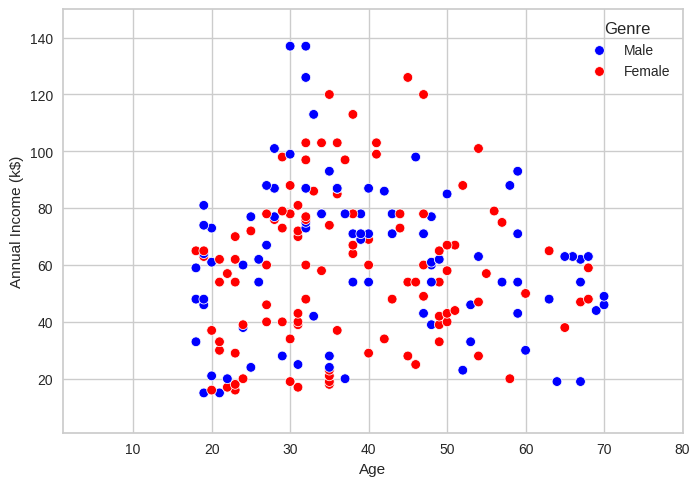

In [ ]:
palette = {'Female': 'red', 'Male': 'blue'}

ax = sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Genre', data=df, palette=palette)

ax.set_xlim(1, 80)
ax.set_ylim(1, 150)
ax

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

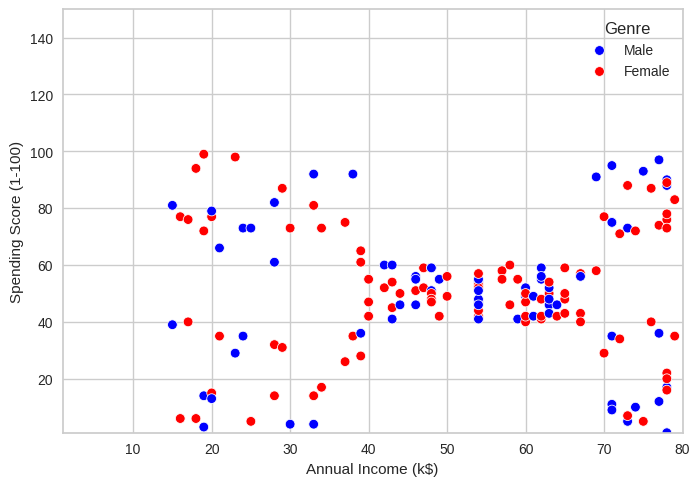

In [ ]:
palette = {'Female': 'red', 'Male': 'blue'}

ax = sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=df, palette=palette)

ax.set_xlim(1, 80)
ax.set_ylim(1, 150)
ax

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

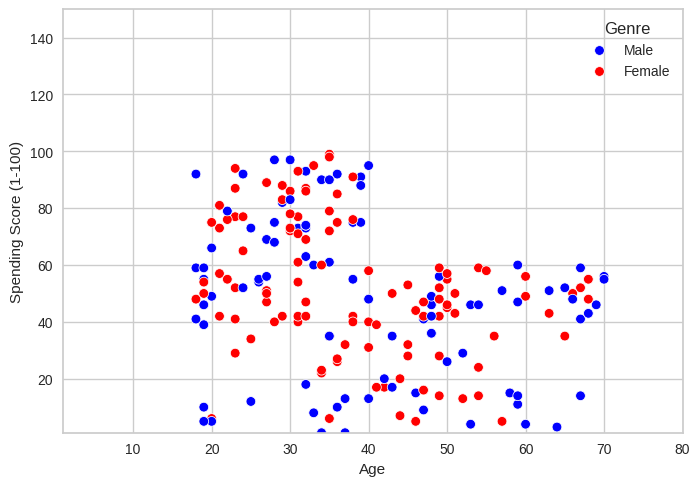

In [ ]:
palette = {'Female': 'red', 'Male': 'blue'}

ax = sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Genre', data=df, palette=palette)

ax.set_xlim(1, 80)
ax.set_ylim(1, 150)
ax

# **2. Clusters**

**Kmeans**

In [ ]:
scaler = StandardScaler()
print(scaler.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values))
print(scaler.mean_)
print(scaler.transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values))

df[['age_std', 'income_std', 'score_std']] = scaler.transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values)
features = ['age_std', 'income_std', 'score_std']

StandardScaler()
[38.85 60.56 50.2 ]
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]
 [-1.20926872 -1.66266033  1.00159627]
 [-0.27630176 -1.62449091 -1.71591298]
 [-1.13750203 -1.62449091  1.70038436]
 [ 1.80493225 -1.58632148 -1.83237767]
 [-0.6351352  -1.58632148  0.84631002]
 [ 2.02023231 -1.58632148 -1.4053405 ]
 [-0.27630176 -1.58632148  1.89449216]
 [ 1.37433211 -1.54815205 -1.36651894]
 [-1.06573534 -1.54815205  1.04041783]
 [-0.13276838 -1.54815205 -1.44416206]
 [-1.20926872 -1.54815205  1.11806095]
 [-0.27630176 -1.50998262 -0.59008772]
 [-1.3528021  -1.50998262  0.61338066]
 [ 0.94373197 -1.43364376 -0.82301709]
 [-0.27630176 -1.43364376  1.8556706 ]
 [-0.27630176 -1.39547433 -0.59008772]
 [-0.99396865 -1.39547433  0.88513158]
 [ 0.51313183 -1.3573049  -1.75473454]
 [-0.56336851 -1.3573049   0.88513158]
 [ 1.08726535 -1.24279661 -

In [ ]:
inertia = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df[features])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

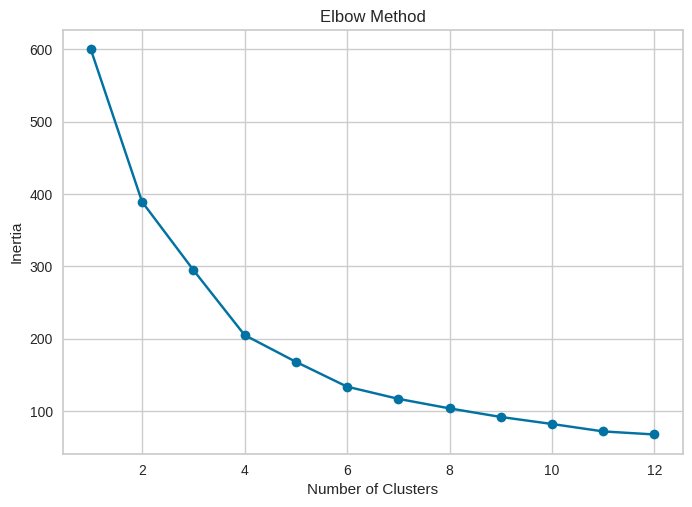

In [ ]:
plt.plot(range(1, 13), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

O número de clusters considerado ideal foi 6 para todas as colunas, através da visualização do método do cotovelo.

# **2.1. Age e Annual Income (k$)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


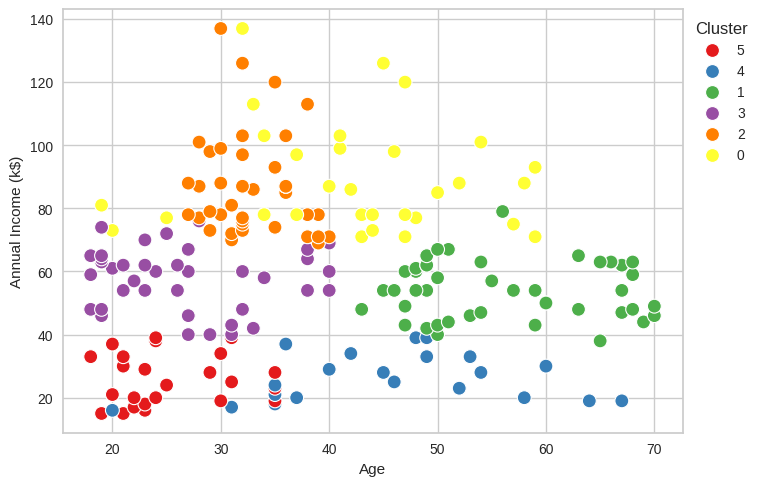

In [ ]:
# Apply K-Means with the current value of k
kmeans = KMeans(n_clusters=6, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[features])
df['Cluster'] = df['Cluster'].astype(str)

# Scatter plot of data points with cluster coloring
ax = sns.scatterplot(data=df, s=100, x='Age', y='Annual Income (k$)', hue='Cluster', palette='Set1')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [ ]:
kmeans

KMeans(n_clusters=6, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

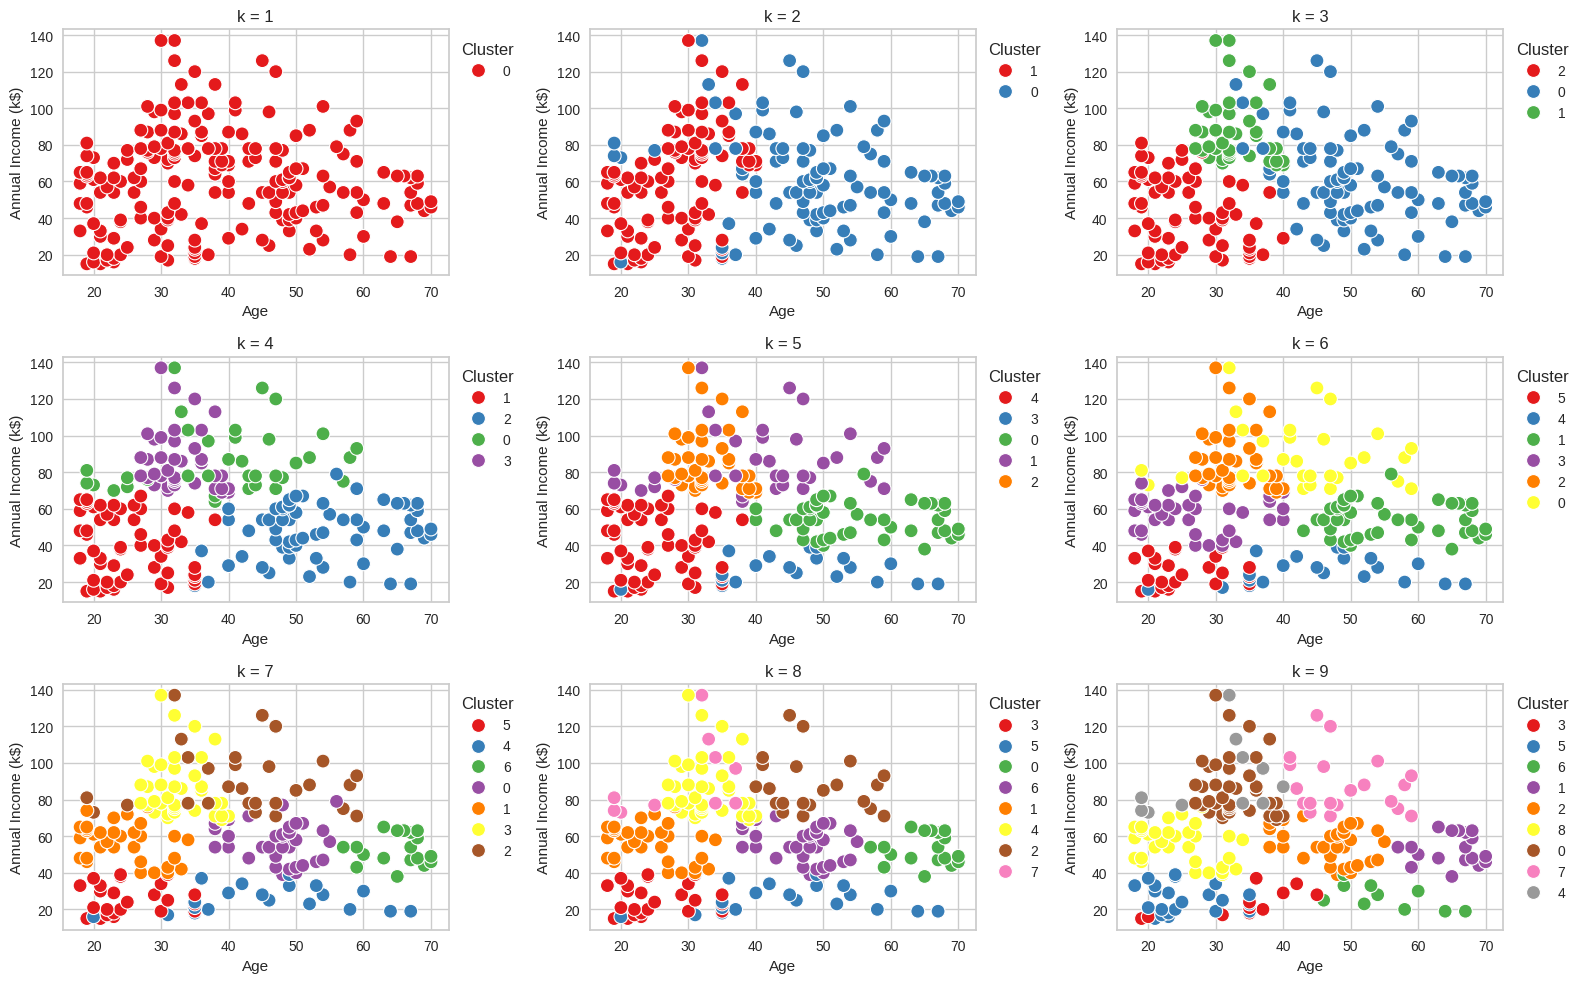

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 9 # apesar de 6 clusters ter sido considerado o ideal, foram colocados 9 clusters para fins de comparação

# Calculate the number of rows and columns for the grid of plots
rows = (num_clusters + 1) // 3
cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    ax = sns.scatterplot(ax=axes[row, col], data=df, s=100, x='Age', y='Annual Income (k$)', hue='Cluster', palette='Set1')

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

**Avaliação dos cluster Age e Annual Income (k$)**

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'age_std', 'income_std', 'score_std',
       'Cluster'],
      dtype='object')

In [ ]:
X=df[['Age', 'Annual Income (k$)']]

In [ ]:
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))

    print('With in sum of squared error (WCSS) at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

With in sum of squared error (WCSS) at K = 2 : 87121.56591478694
Silhouette Coefficient: 0.426
Calinski-Harabasz Index: 202.240
Davies-Bouldin Index: 0.880
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 3 : 59486.961439280356
Silhouette Coefficient: 0.425
Calinski-Harabasz Index: 193.105
Davies-Bouldin Index: 0.819
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 4 : 39502.778500645385
Silhouette Coefficient: 0.434
Calinski-Harabasz Index: 225.932
Davies-Bouldin Index: 0.769
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 5 : 31659.353138717805
Silhouette Coefficient: 0.402
Calinski-Harabasz Index: 222.427
Davies-Bouldin Index: 0.775
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 6 : 25399.022004416987
Silhouette Coefficient: 0.396
Calinski-Harabasz Ind

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


O índice de silhueta varia de -1 a 1. Quanto mais próximo de 1 é o ideal e o mais próximo de -1, o agrupamento precisaria ser refeito.Em geral, um coeficiente de silhueta acima de 0.5 é considerado bom, e acima de 0.7 é excelente. Nesse contexto, com base nesses resultados, o melhor seria 4 clusters (0.434), não 6 (0.396).

O índice de Calinski-Harabasz não tem um intervalo fixo e seus valores absolutos são menos importantes que sua comparação entre diferentes números de clusters.Esse índice mede a razão entre a variância entre clusters e a variância dentro dos clusters. Quanto maior o valor, melhor a separação e compactação dos clusters.Nesse contexto, com base nesses resultados, o melhor seria 9 clusters (239.023).

O índice de Davies-Bouldin não tem um intervalo fixo e valores menores são melhores. Em geral, um valor abaixo de 1 é considerado bom, e valores ainda menores são preferíveis. Nesse contexto, com base nesses resultados, o melhor seria 4 clusters (0.769), não 6 (0.816).

Enfim, diante da comparação de três índices, 4 clusters foi tido como ideal, nos termos do índice de silhueta e índice de Davies-Bouldin. Para confirmar, foi plotado o gráfico de cotovelo novamente.





**Curva do Cotovelo para definir o valor de K**

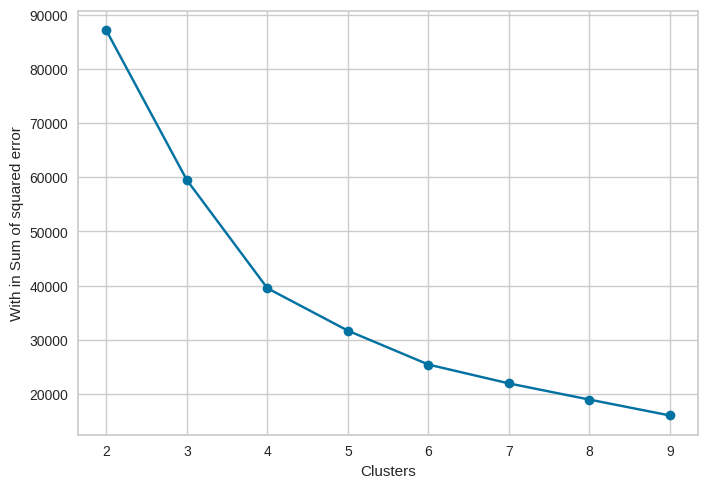

In [ ]:
plt.plot(index, se, marker='o')
plt.xlabel('Clusters')
plt.ylabel('With in Sum of squared error')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

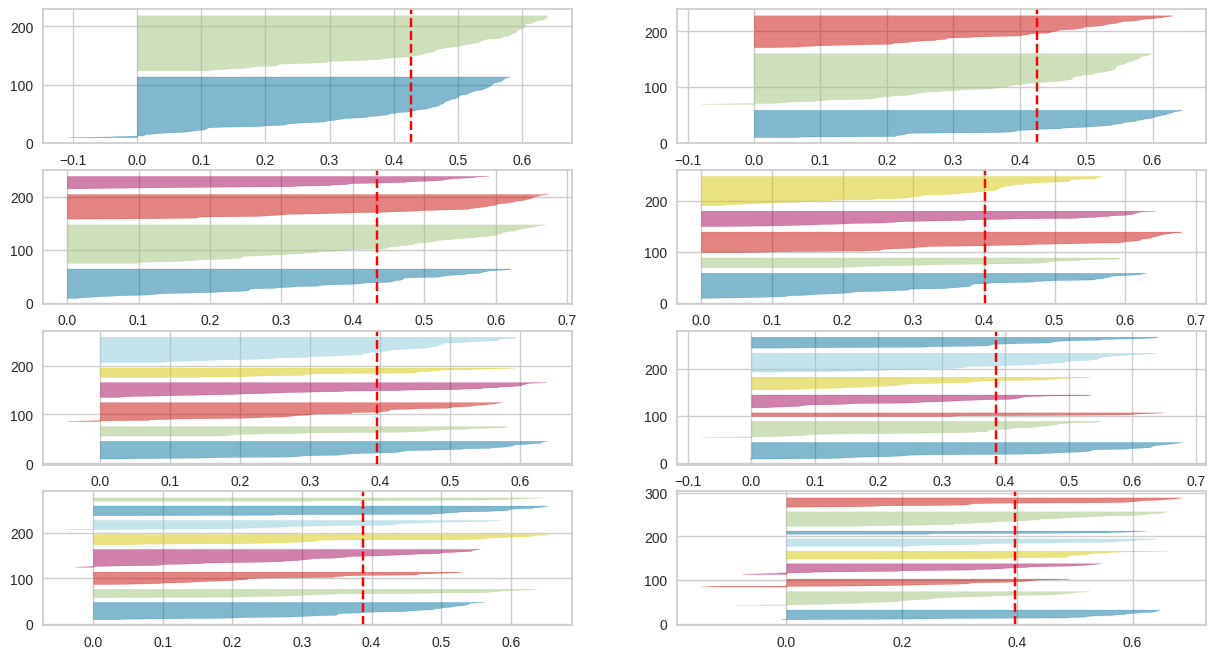

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9]:
  q, mod = divmod(i, 2)
  km = KMeans(n_clusters=i, random_state=42)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

Após visualizar os gráficos de silhueta, infere-se que o número de clusters ideal é 4. Os graficos que mostram 2, 3, 6, 7, 8 e 9 clusters possuem valores negativos, o que indica que os pontos podem estar em clusters errados.

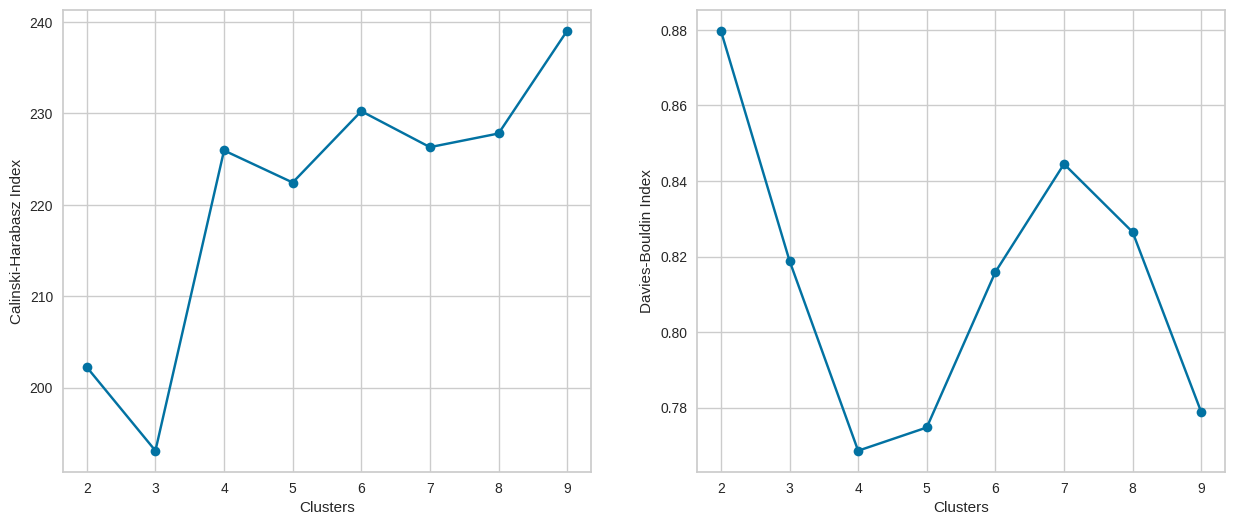

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(index, calinski_score, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Calinski-Harabasz Index')

ax[1].plot(index, davies_score, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Davies-Bouldin Index')

plt.show()

**Modelo Final**

In [ ]:
kmeans = KMeans(n_clusters= 4, random_state=42)
labels = kmeans.fit_predict(X)

print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))

Silhouette Coefficient: 0.500
Calinski-Harabasz Index: 332.563
Davies-Bouldin Index: 0.687


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df['labels']=labels

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_std,income_std,score_std,Cluster,labels
0,1,Male,19,15,39,-1.424569,-1.738999,-0.434801,3,0
1,2,Male,21,15,81,-1.281035,-1.738999,1.195704,5,0
2,3,Female,20,16,6,-1.352802,-1.700830,-1.715913,3,0
3,4,Female,23,16,77,-1.137502,-1.700830,1.040418,5,0
4,5,Female,31,17,40,-0.563369,-1.662660,-0.395980,3,0


In [ ]:
df.labels.unique()

array([0, 2, 1], dtype=int32)

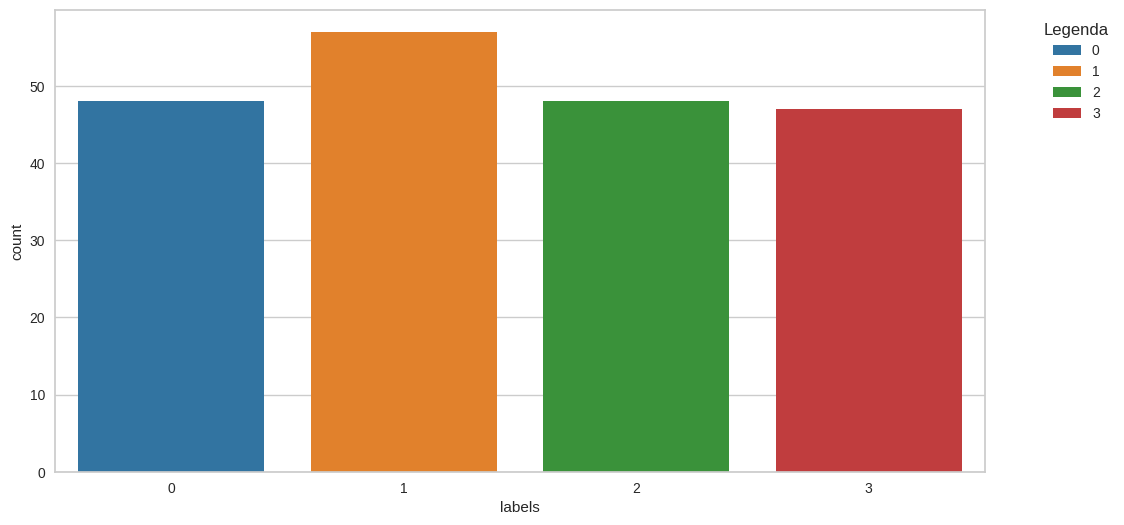

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='labels', palette="tab10", hue= labels)
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **2.2 Annual Income (k$) e	Spending Score (1-100)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

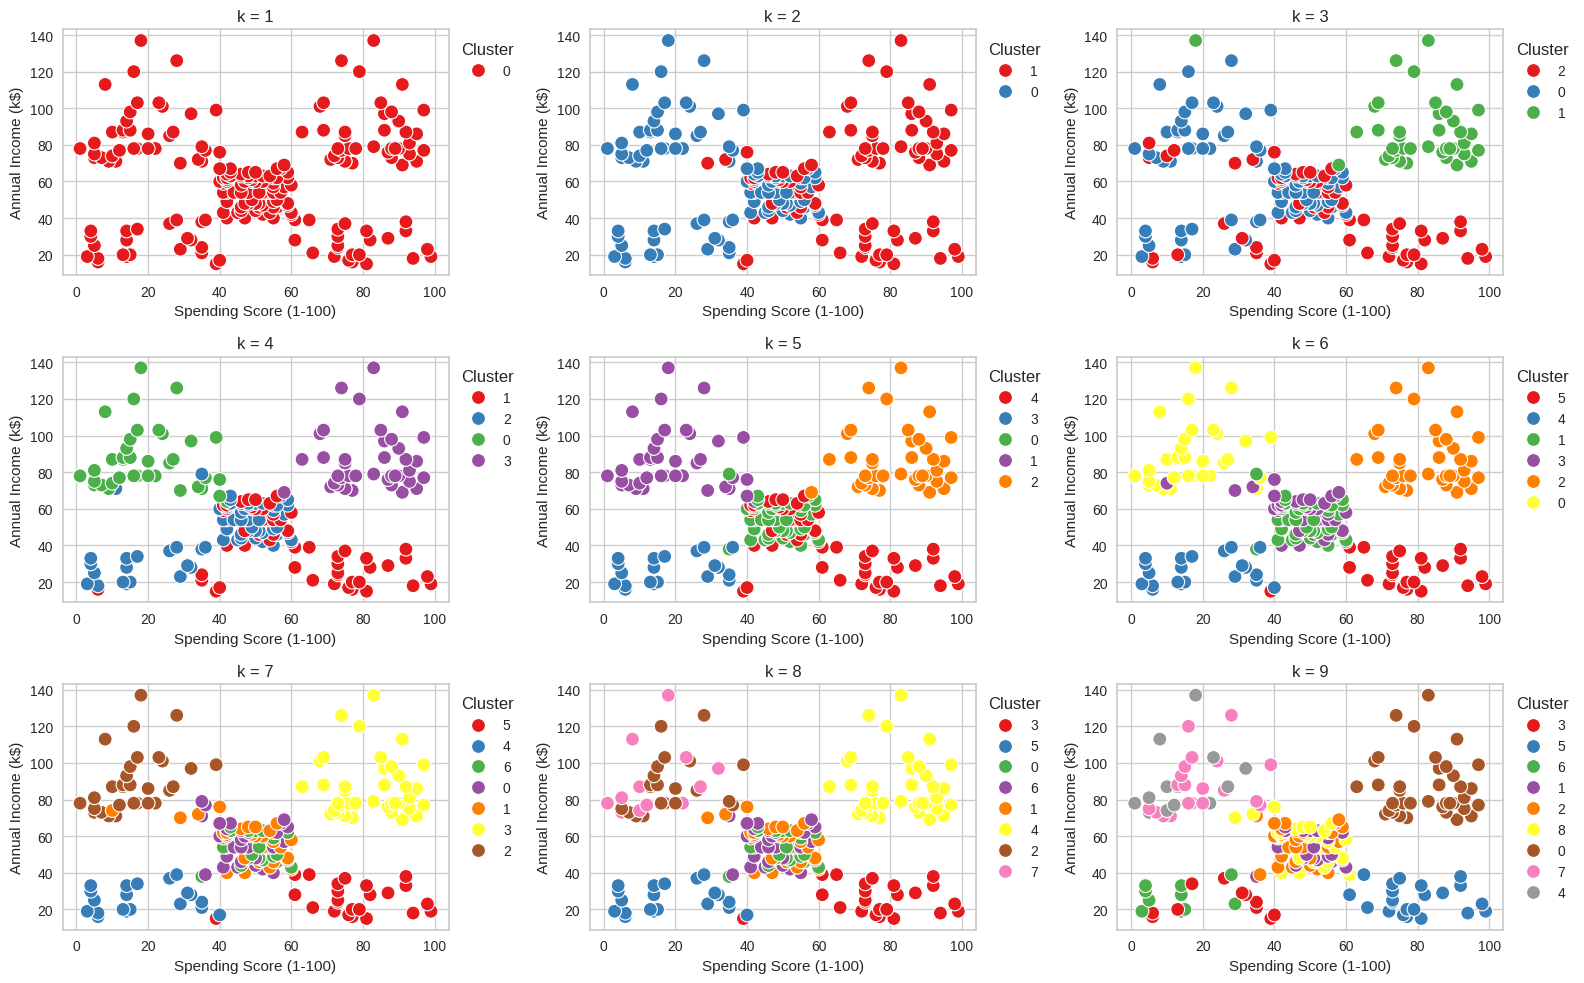

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 9

# Calculate the number of rows and columns for the grid of plots
rows = (num_clusters + 1) // 3
cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    ax = sns.scatterplot(ax=axes[row, col], data=df, s=100, x='Spending Score (1-100)', y='Annual Income (k$)', hue='Cluster', palette='Set1')

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

**Ajuste dos dados no Cluster em K-Means**

In [ ]:
x=df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(x)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(x, labels))
    calinski_score.append(calinski_harabasz_score(x, labels))
    davies_score.append(davies_bouldin_score(x, labels))

    print('With in sum of squared error (WCSS) at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(x, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(x, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(x, labels))
    print("---------------------------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

With in sum of squared error (WCSS) at K = 2 : 181363.59595959607
Silhouette Coefficient: 0.297
Calinski-Harabasz Index: 96.747
Davies-Bouldin Index: 1.257
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 3 : 106348.37306211119
Silhouette Coefficient: 0.468
Calinski-Harabasz Index: 151.557
Davies-Bouldin Index: 0.715
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 4 : 73679.78903948837
Silhouette Coefficient: 0.493
Calinski-Harabasz Index: 174.064
Davies-Bouldin Index: 0.710
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 5 : 44448.45544793369
Silhouette Coefficient: 0.554
Calinski-Harabasz Index: 247.359
Davies-Bouldin Index: 0.573
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 6 : 37233.81451071002
Silhouette Coefficient: 0.540
Calinski-Harabasz Index:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


O índice de silhueta varia de -1 a 1. Quanto mais próximo de 1 é o ideal e o mais próximo de -1, o agrupamento precisaria ser refeito.Em geral, um coeficiente de silhueta acima de 0.5 é considerado bom, e acima de 0.7 é excelente. Nesse contexto, com base nesses resultados, o melhor é 5 clusters (0.554).

O índice de Calinski-Harabasz não tem um intervalo fixo e seus valores absolutos são menos importantes que sua comparação entre diferentes números de clusters.Esse índice mede a razão entre a variância entre clusters e a variância dentro dos clusters. Quanto maior o valor, melhor a separação e compactação dos clusters.Nesse contexto, com base nesses resultados, o melhor seria 9 clusters (270.228).

O índice de Davies-Bouldin não tem um intervalo fixo e valores menores são melhores. Em geral, um valor abaixo de 1 é considerado bom, e valores ainda menores são preferíveis. Nesse contexto, com base nesses resultados, o melhor seria 5 clusters (0.573), não 6 (0.652).

Enfim, diante da comparação de três índices, 5 clusters foi tido como ideal, nos termos do índice de silhueta e índice de Davies-Bouldin. Para confirmar, foi plotado o gráfico de cotovelo novamente.

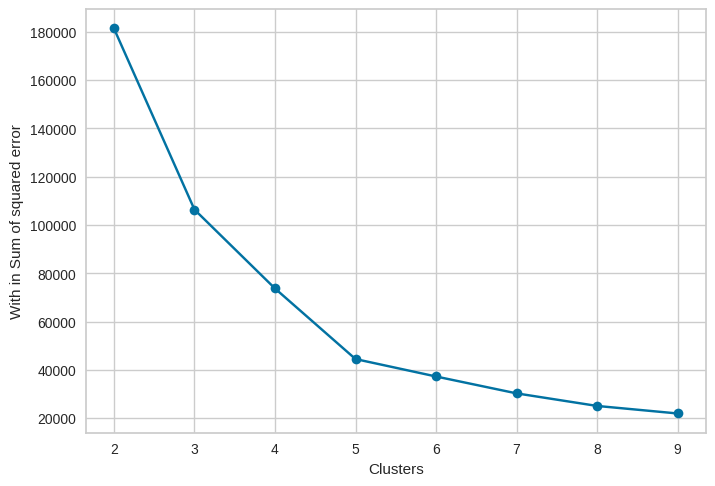

In [ ]:
plt.plot(index, se, marker='o')
plt.xlabel('Clusters')
plt.ylabel('With in Sum of squared error')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

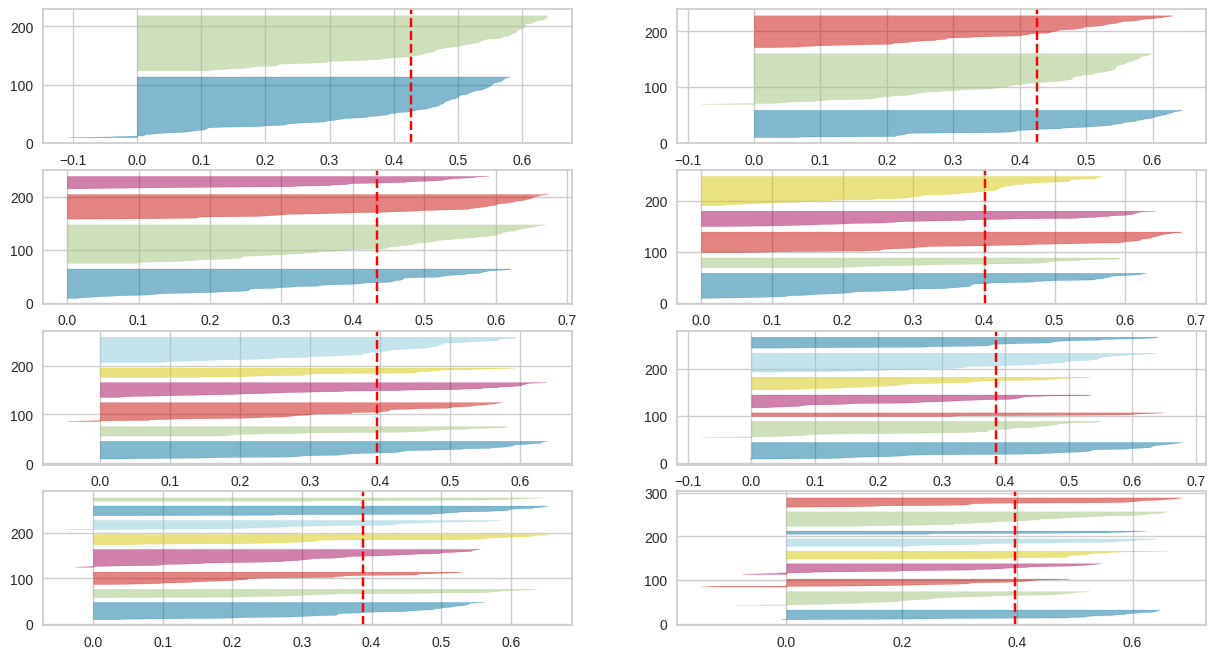

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9]:
  q, mod = divmod(i, 2)
  km = KMeans(n_clusters=i, random_state=42)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

Após visualizar os gráficos de silhueta, infere-se que o número de clusters ideal é 5. Os graficos que mostram 2, 3, 6, 7, 8 e 9 clusters possuem valores negativos, o que indica que os pontos podem estar em clusters errados.

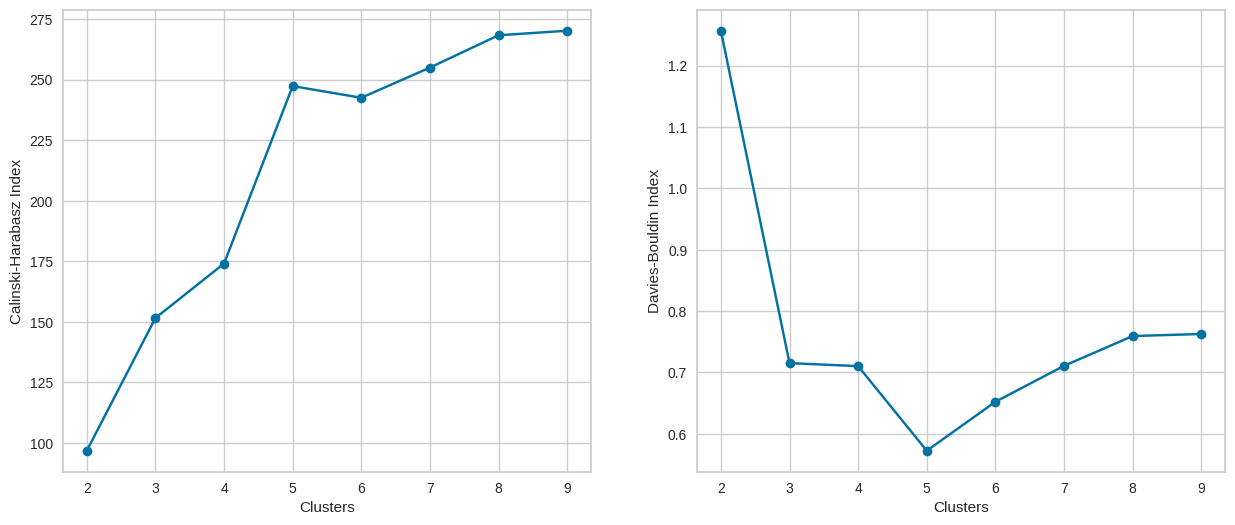

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(index, calinski_score, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Calinski-Harabasz Index')

ax[1].plot(index, davies_score, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Davies-Bouldin Index')

plt.show()

**Modelo Final**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))

Silhouette Coefficient: 0.434
Calinski-Harabasz Index: 225.932
Davies-Bouldin Index: 0.769


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df['labels']=labels

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_std,income_std,score_std,Cluster,labels
0,1,Male,19,15,39,-1.424569,-1.738999,-0.434801,3,2
1,2,Male,21,15,81,-1.281035,-1.738999,1.195704,5,2
2,3,Female,20,16,6,-1.352802,-1.700830,-1.715913,3,2
3,4,Female,23,16,77,-1.137502,-1.700830,1.040418,5,2
4,5,Female,31,17,40,-0.563369,-1.662660,-0.395980,3,2


In [ ]:
df.labels.unique()

array([2, 0, 1, 3], dtype=int32)

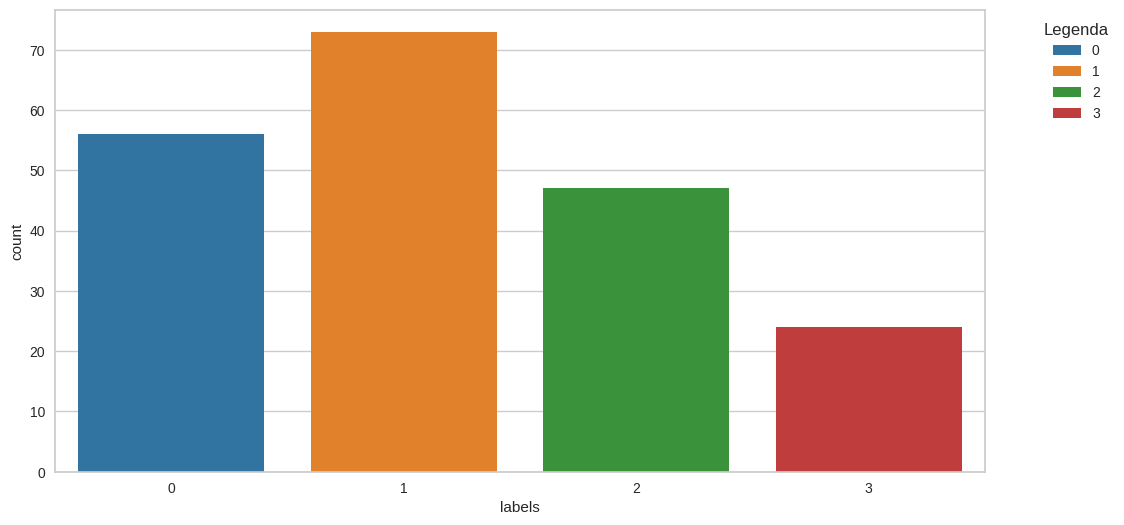

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='labels', palette="tab10", hue= labels)
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# **2.3 Age e Spending Score (1-100)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

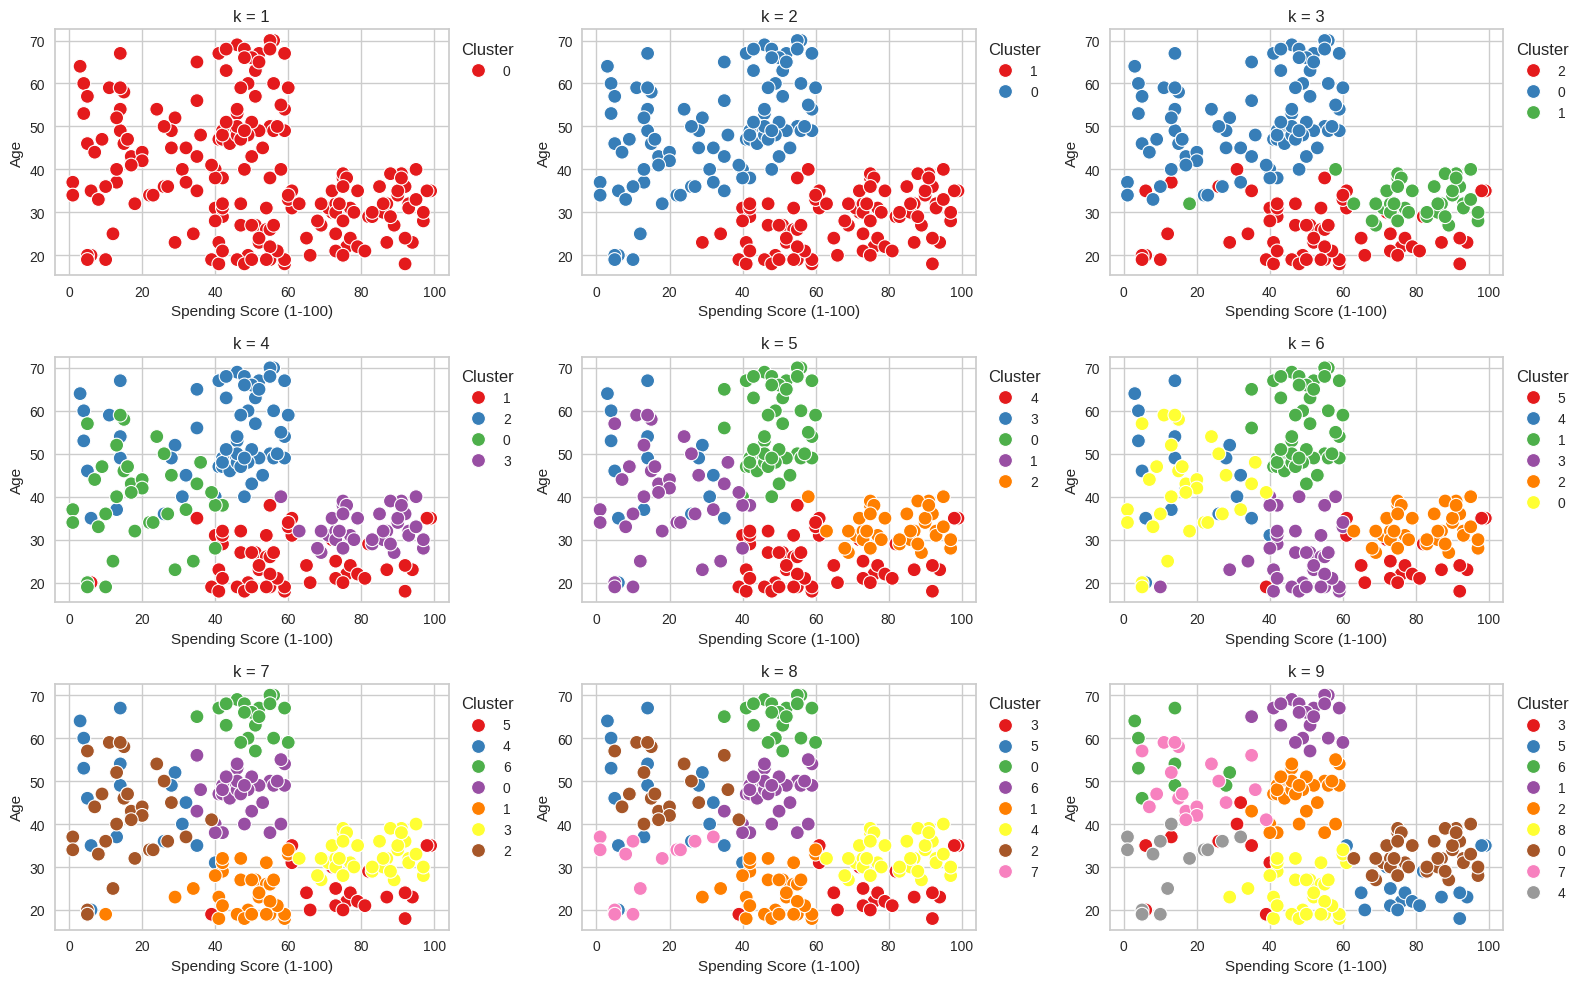

In [ ]:
# Define the number of clusters you want to visualize
num_clusters = 9

# Calculate the number of rows and columns for the grid of plots
rows = (num_clusters + 1) // 3
cols = 3

# Create a grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 10))


# Loop through each value of k
for k in range(1, num_clusters + 1):
    row = (k - 1) // cols
    col = (k - 1) % cols

    # Apply K-Means with the current value of k
    kmeans = KMeans(n_clusters=k, random_state=0)
    df['Cluster'] = kmeans.fit_predict(df[features])
    df['Cluster'] = df['Cluster'].astype(str)

    # Scatter plot of data points with cluster coloring
    ax = sns.scatterplot(ax=axes[row, col], data=df, s=100, x='Spending Score (1-100)', y='Age', hue='Cluster', palette='Set1')

    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

    axes[row, col].set_title(f'k = {k}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
df[df['Cluster'] == '3']

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_std,income_std,score_std,Cluster,labels
0,1,Male,19,15,39,-1.424569,-1.738999,-0.434801,3,2
2,3,Female,20,16,6,-1.352802,-1.700830,-1.715913,3,2
4,5,Female,31,17,40,-0.563369,-1.662660,-0.395980,3,2
6,7,Female,35,18,6,-0.276302,-1.624491,-1.715913,3,2
14,15,Male,37,20,13,-0.132768,-1.548152,-1.444162,3,2
16,17,Female,35,21,35,-0.276302,-1.509983,-0.590088,3,2
20,21,Male,35,24,35,-0.276302,-1.395474,-0.590088,3,2
26,27,Female,45,28,32,0.441365,-1.242797,-0.706552,3,2
28,29,Female,40,29,31,0.082532,-1.204627,-0.745374,3,2
36,37,Female,42,34,17,0.226065,-1.013780,-1.288876,3,2


In [ ]:
kmeans.inertia_

91.95683885423577

**Ajuste dos dados no Cluster (K-Means)**

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'age_std', 'income_std', 'score_std',
       'Cluster', 'labels'],
      dtype='object')

In [ ]:
X=df[['Age','Spending Score (1-100)']]

In [ ]:
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))

    print('With in sum of squared error (WCSS) at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

With in sum of squared error (WCSS) at K = 2 : 75949.15601023012
Silhouette Coefficient: 0.469
Calinski-Harabasz Index: 249.194
Davies-Bouldin Index: 0.772
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 3 : 45840.67661610871
Silhouette Coefficient: 0.453
Calinski-Harabasz Index: 270.086
Davies-Bouldin Index: 0.829
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 4 : 28165.583566629342
Silhouette Coefficient: 0.500
Calinski-Harabasz Index: 332.563
Davies-Bouldin Index: 0.687
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 5 : 23811.5235247209
Silhouette Coefficient: 0.445
Calinski-Harabasz Index: 302.439
Davies-Bouldin Index: 0.785
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 6 : 19566.5223413776
Silhouette Coefficient: 0.448
Calinski-Harabasz Index: 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


O índice de silhueta varia de -1 a 1. Quanto mais próximo de 1 é o ideal e o mais próximo de -1, o agrupamento precisaria ser refeito.Em geral, um coeficiente de silhueta acima de 0.5 é considerado bom, e acima de 0.7 é excelente. Nesse contexto, com base nesses resultados, o melhor é 4 clusters (0.500).

O índice de Calinski-Harabasz não tem um intervalo fixo e seus valores absolutos são menos importantes que sua comparação entre diferentes números de clusters.Esse índice mede a razão entre a variância entre clusters e a variância dentro dos clusters. Quanto maior o valor, melhor a separação e compactação dos clusters.Nesse contexto, com base nesses resultados, o melhor seria 9 clusters (333.700).

O índice de Davies-Bouldin não tem um intervalo fixo e valores menores são melhores. Em geral, um valor abaixo de 1 é considerado bom, e valores ainda menores são preferíveis. Nesse contexto, com base nesses resultados, o melhor seria 4 clusters (0.687).

Enfim, diante da comparação de três índices, 4 clusters foi tido como ideal, nos termos do índice de silhueta e índice de Davies. Para confirmar, foi plotado o gráfico de cotovelo novamente.

**Curva do Cotovelo para definir o valor de K**

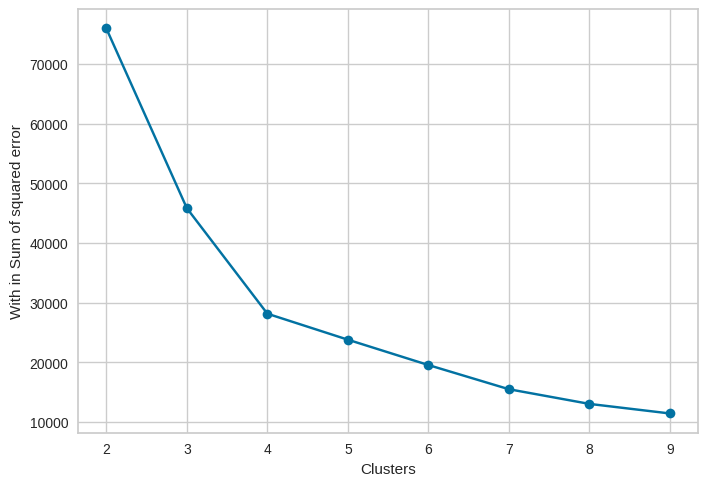

In [ ]:
plt.plot(index, se, marker='o')
plt.xlabel('Clusters')
plt.ylabel('With in Sum of squared error')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

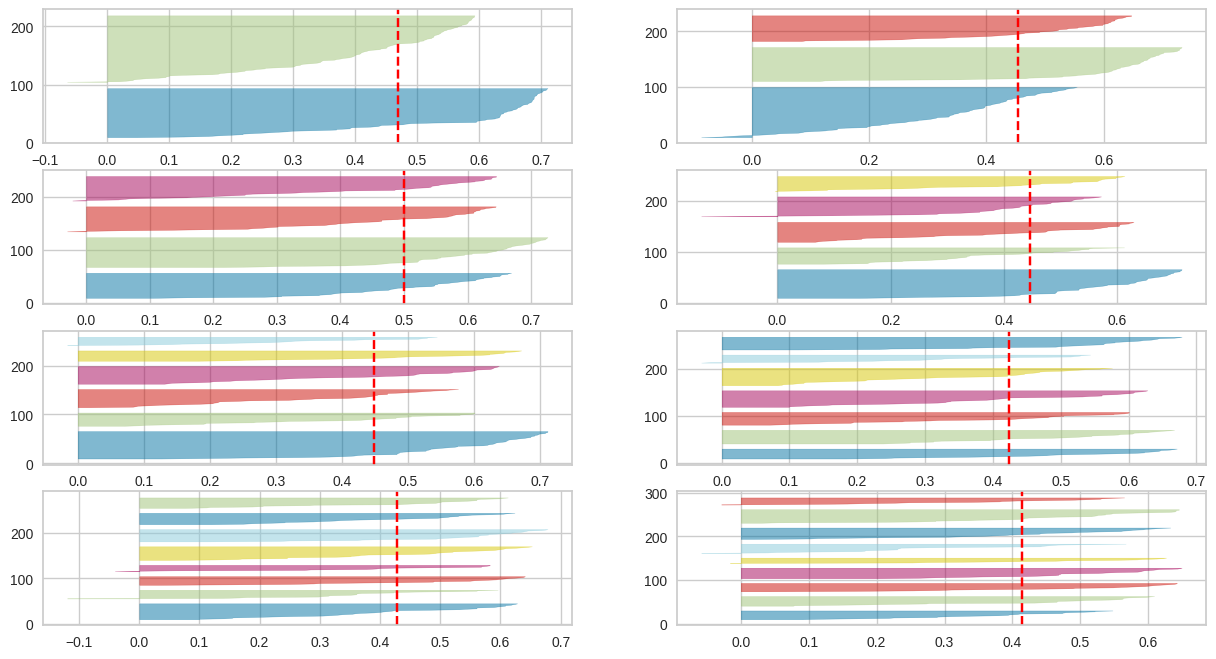

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9]:
  q, mod = divmod(i, 2)
  km = KMeans(n_clusters=i, random_state=42)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

Após visualizar os gráficos de silhueta, infere-se que o número de clusters ideal é 4. Os graficos que mostram 2, 3, 6, 7, 8 e 9 clusters possuem valores negativos, o que indica que os pontos podem estar em clusters errados.

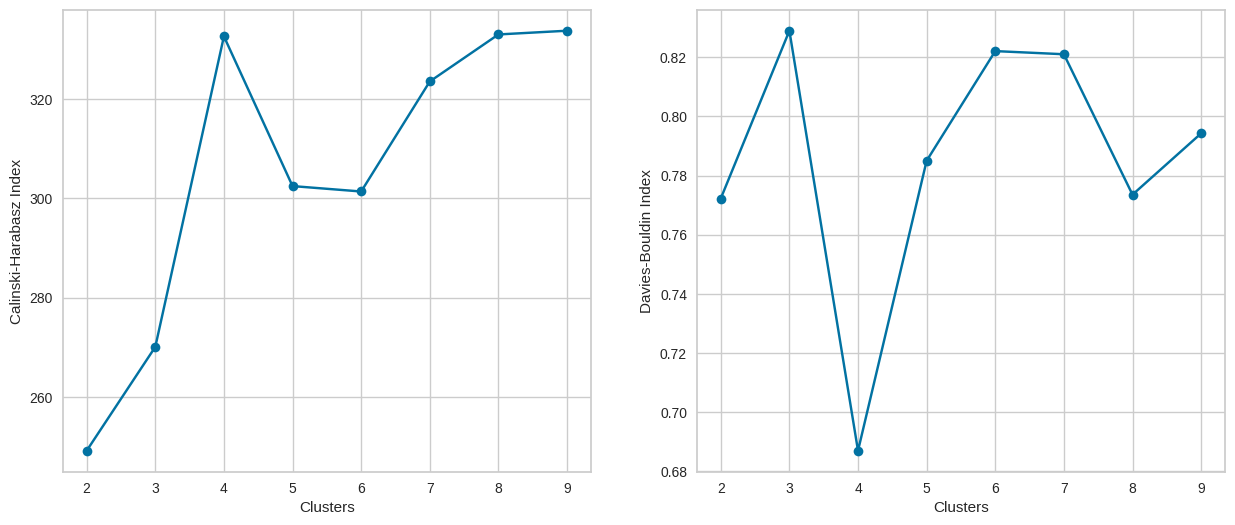

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(index, calinski_score, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Calinski-Harabasz Index')

ax[1].plot(index, davies_score, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Davies-Bouldin Index')

plt.show()

**Modelo Final**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))

Silhouette Coefficient: 0.500
Calinski-Harabasz Index: 332.563
Davies-Bouldin Index: 0.687


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df['labels']=labels

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),age_std,income_std,score_std,Cluster,labels
0,1,Male,19,15,39,-1.424569,-1.738999,-0.434801,3,3
1,2,Male,21,15,81,-1.281035,-1.738999,1.195704,5,1
2,3,Female,20,16,6,-1.352802,-1.700830,-1.715913,3,2
3,4,Female,23,16,77,-1.137502,-1.700830,1.040418,5,1
4,5,Female,31,17,40,-0.563369,-1.662660,-0.395980,3,3


In [ ]:
data = pd.merge(df,df['labels'],how='left',left_index=True,right_index=True)

In [ ]:
df.labels.unique()

array([3, 1, 2, 0], dtype=int32)

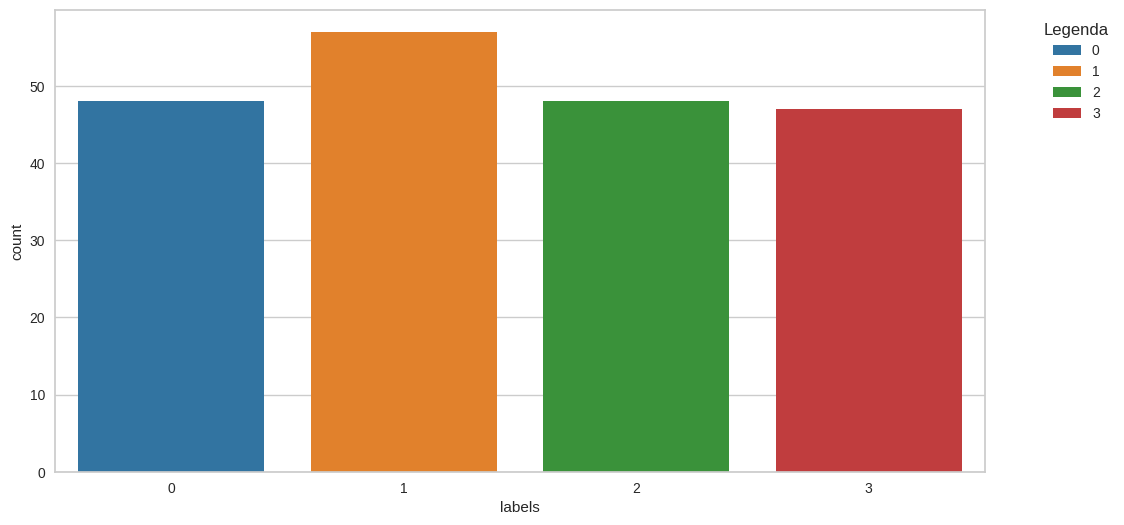

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df,x='labels', palette="tab10", hue= labels)
plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()